In [1]:
import numpy as np
from bound_rewards_g import compute_bound as compute_bound
from f_func import *
from lava_problem import main as lava_problem
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import gurobipy

In [113]:
# Initialize
def g(x,c,func_list):
    # c and func_list should have matching dimensions
    y = 0
    for i in range (len(func_list)):
        y += c[i]*eval(func_list[i])(x)
    return y

# Different probabilities of sensor reporting correct state
p_correct_vals = np.linspace(0.01, 0.99, 20) 

# Different rewards for being in a non-lava/goal state
reward_xs = np.array([0.1]) 

#for reward_x in reward_xs:
reward_x = reward_xs[0]

bounds_f_inverse = []

#Setup for finding tightest bounds
#func_list = [ 'Kullback_Leibler', 'Total_Variation','Chi_Squared','Negative_Log']
#func_list = [ 'Kullback_Leibler', 'Negative_Log','Total_Variation', 'Chi_Squared', 'Jensen_Shannon','Squared_Hellinger_Distance','Neyman_Chi_Squared']
func_list = [ 'Kullback_Leibler', 'Negative_Log','Total_Variation', 'Chi_Squared','Neyman_Chi_Squared']
#'Negative_Log',

#c01 = np.tile(np.array([0,1,0,0]),(7,1))
#c02 = np.tile(np.array([0.5,0.5,0.5,0.5]),(1,1))
#c03 = np.tile(np.array([0,0,0,1]),(1,1))
#c04 = np.tile(np.array([0.1,0.1,0.3,1]),(3,1))
#c05 = np.tile(np.array([1e-5,1e-5,1e-5,1]),(13,1))

#c0 = np.concatenate((c01,c02,c03,c02,c04,c05))
#c0 = np.concatenate((c01,c05))

ca = np.tile(np.array([1e-5,1e-5,1,1e-5,1e-5]),(5,1))
cb = np.tile(np.array([1e-5,1e-5,2,1e-5,1e-5]),(1,1))
cc = np.tile(np.array([1e-5,1e-5,1e-5,1e-5,2]),(4,1))
cd = np.tile(np.array([0.5,0.5,0.5,0.5,0.5]),(3,1))
ce = np.tile(np.array([1e-5,1e-5,1,1e-5,1e-5]),(4,1))
cf = np.tile(np.array([1e-5,1e-5,1e-5,1e-5,2]),(1,1))
cg = np.tile(np.array([0.5,0.5,0.5,0.5,0.5]),(2,1))


c0 = np.concatenate((ca,cb,cc,cd,ce,cf,cg))

def con(c_vec):
	return np.linalg.norm(c_vec)-1

def con1(c_vec):
    return list(c_vec-1e-5)

def con2(c_vec):
    return list(1-c_vec)

Nfeval=1
def callbackF(Xi):
    global Nfeval
    #print ('{0:4d}{1: 3.6f}{2: 3.6f}{3: 3.6f}'.format(Nfeval,Xi[0],Xi[1],bounds(Xi)))
    print ('{0:4d}{1: 3.2f}{2: 3.2f}{3: 3.2f}{4: 3.2f}{5: 3.6f}{6: 3.6f}'.format(Nfeval,Xi[0],Xi[1],Xi[2],Xi[3],Xi[4],bounds(Xi)))
    Nfeval += 1

#cons = [{'type':'ineq','fun': con1},{'type':'eq','fun':con},{'type':'ineq','fun': con2}]
cons = [{'type':'ineq','fun': con1},{'type':'ineq','fun': con2}]

def bounds(c_vec):
    nx, nu, ny, T, p0, px_x, py_x, R, R0_expected = lava_problem(['--p_correct', str(p_correct), '--reward_x', str(reward_x)])
    ################################################################################


    ################################################################################
    # Compute f-inverse bound
    # t_start = time.time()
    bound_f_inverse = compute_bound(g,c_vec,func_list, nx, nu, ny, T, p0, px_x, py_x, R, R0_expected) 
    # t_end = time.time()
    bounds_f_inverse.append(bound_f_inverse)
    #print("Bound: ", bound_f_inverse)
    # print("Bound computation time: ", t_end - t_start)
    ################################################################################
    return bound_f_inverse


In [112]:

p_correct = p_correct_vals[17]
#c = np.array([0.5,0.5,0.5,0.5,0.5])
c = np.array([1e-5,1e-5,1e-5,1e-5,2])
#c = np.array([1e-5,1e-5,1,1e-5,1e-5])
Nfeval=1
res1 = optimize.minimize(bounds,c, constraints = cons, callback=callbackF, options={'disp':True})


   1 0.00 0.00 0.00 0.00 1.000000 4.291473
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.291472700819779
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1


In [114]:
# Loop
#coefs = []
#vals = []
#results = []
for ind in range(17, 20):
#for p_correct in p_correct_vals:
	p_correct = p_correct_vals[ind]
	def bounds(c_vec):
		nx, nu, ny, T, p0, px_x, py_x, R, R0_expected = lava_problem(['--p_correct', str(p_correct), '--reward_x', str(reward_x)])
		bound_f_inverse = compute_bound(g,c_vec,func_list, nx, nu, ny, T, p0, px_x, py_x, R, R0_expected) 
		bounds_f_inverse.append(bound_f_inverse)
		return bound_f_inverse

	#ind = np.where(p_correct_vals == p_correct)[0][0]

	res = optimize.minimize(bounds,c0[ind], constraints = cons, callback=callbackF, options={'disp':True})
	results.append(res)
	coefs.append(res.x)
	vals.append(res.fun)


   1 0.00 0.00 0.00 0.00 1.000000 4.291473
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.291472700819779
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
   2 0.50 0.50 0.46 0.50 0.505774 4.311192
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.311253298595756
            Iterations: 1
            Function evaluations: 17
            Gradient evaluations: 1
   3 0.50 0.50 0.50 0.50 0.500000 4.322424
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.322424313043292
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


In [ ]:
bounds_f_inverse = []
func_list = ['Kullback_Leibler', 'Negative_Log', 'Total_Variation', 'Chi_Squared', 'Jensen_Shannon', 'Squared_Hellinger_Distance','Neyman_Chi_Squared']

def tight_bound(p_correct):
    ################################################################################
    # Lava problem
    nx, nu, ny, T, p0, px_x, py_x, R, R0_expected = lava_problem(['--p_correct', str(p_correct), '--reward_x', str(reward_x)])
    ################################################################################
    
    bounds_tight = np.zeros(len(func_list))
    for i in range(len(func_list)):
        c_vec = np.zeros(len(func_list))
        c_vec[i]=1
        ################################################################################
        # Compute f-inverse bound
        bound_f_inverse = compute_bound(g,c_vec,func_list, nx, nu, ny, T, p0, px_x, py_x, R, R0_expected)
        bounds_tight[i]=bound_f_inverse
        ################################################################################
    
    bound_tight = np.amin(bounds_tight)
    fun = np.where(bounds_tight == bound_tight)[0][0]

    print("Bound: ", bound_tight, func_list[fun])
    return bound_tight, fun

for p_correct in p_correct_vals:
    bound_f_inverse = tight_bound(p_correct)
    bounds_f_inverse.append(bound_f_inverse)


In [115]:
np.savez('tightest_bounds_5',p_correct_vals=p_correct_vals, bounds=bounds_tight)

NameError: name 'bounds_tight' is not defined

In [ ]:
opt_data = np.load("results/lava_problem_optimal_results.npz")
p_correct_vals = opt_data['p_correct_vals']
opt_values = opt_data['opt_values']

# Plot
fig, ax = plt.subplots()
ax.plot(p_correct_vals, opt_values, '*--', label='POMDP', linewidth=0.5)

data = np.load("tightest_bounds.npz")
bounds = data['bounds']
ax.plot(p_correct_vals, bounds, 'o--', label='tightest', linewidth=1) 

plt.xlabel('$p_{correct}$', fontsize=15)
plt.ylabel('Cumulative reward', fontsize=15)
plt.legend(fontsize=12, loc='lower right')
plt.ylim([0, 5.01])
plt.show() 

In [ ]:
bounds_tight = []
for i in range(len(bounds_f_inverse)):
    bounds_tight.append(bounds_f_inverse[i][0])

In [19]:
coefs = []
vals = []
for ind in range(20):
    coefs.append(results[ind].x)
    vals.append(results[ind].fun)

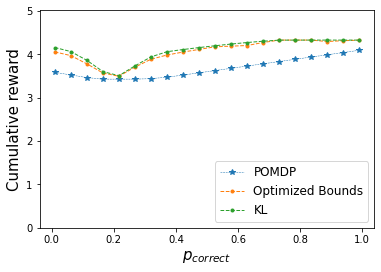

In [117]:
opt_data = np.load("results/lava_problem_optimal_results.npz")
p_correct_vals = opt_data['p_correct_vals']
opt_values = opt_data['opt_values']

fig, ax = plt.subplots()
ax.plot(p_correct_vals, opt_values, '*--', label='POMDP', linewidth=0.5)
ax.plot(p_correct_vals,vals,'.--', label='Optimized Bounds', linewidth=1)

data = np.load("results/lava_problem_Kullback_Leibler_results_f.npz")
bounds = data['bounds']
ax.plot(p_correct_vals, bounds, '.--', label='KL', linewidth=1)

#data = np.load("tightest_bounds.npz")
#bounds = data['bounds']
#ax.plot(p_correct_vals, bounds, '.--', label='Tightest Bounds', linewidth=1)

plt.xlabel('$p_{correct}$', fontsize=15)
plt.ylabel('Cumulative reward', fontsize=15)
plt.legend(fontsize=12, loc='lower right')
plt.ylim([0, 5.01])
plt.savefig('Tight_Bounds_vs_KL_5.svg', dpi=200)
plt.show() 


In [110]:
list(range(17,20))

[17, 18, 19]